<a href="https://colab.research.google.com/github/panghanwu/build_neural_network_python/blob/main/MLP_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

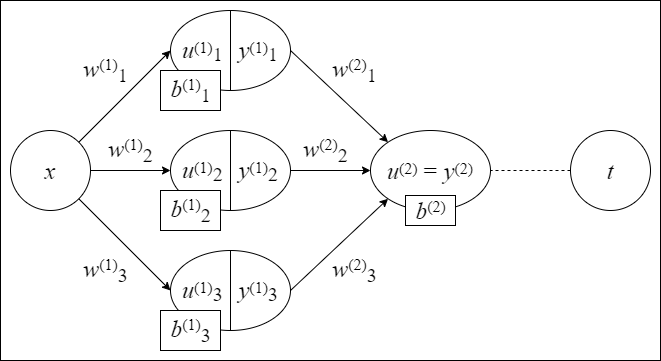

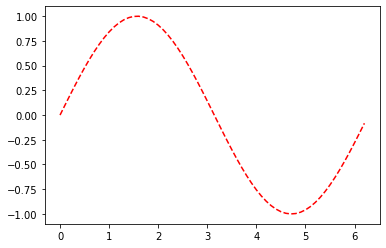

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"""Data"""
x = np.arange(0, np.pi*2, 0.1)  # input data
t = np.sin(x)  # correct answer

plt.plot(x, t, 'r--')

In [2]:
batch_size = len(x)
wb_shrinker = 0.01 #  initialize
eta = 0.1  # learning rate

In [3]:
"""Initial Values"""

w1 = wb_shrinker * np.random.randn(1,3)
b1 = wb_shrinker * np.random.randn(3)
w2 = wb_shrinker * np.random.randn(3,1)
b2 = wb_shrinker * np.random.randn(1)

print('w1 =', w1, '\n')
print('b1 =', b1, '\n')
print('w2 =', w2, '\n')
print('b2 =', b2, '\n')

w1 = [[ 0.00663911 -0.00433347  0.00948886]] 

b1 = [-0.00955213  0.00208376 -0.0140268 ] 

w2 = [[ 0.01292702]
 [-0.00720875]
 [ 0.00819273]] 

b2 = [8.75203118e-05] 



In [4]:
"""Forward Propagation of Middle Layer"""
u1 = np.dot(x.reshape(-1,1), w1) + b1
y1 = 1/(1+np.exp(-u1))

print('u1:', u1[:6,:], '\n...\n')
print('y1:', y1[:6,:], '\n...\n')

u1: [[-9.55213448e-03  2.08376435e-03 -1.40268035e-02]
 [-8.88822367e-03  1.65041744e-03 -1.30779180e-02]
 [-8.22431285e-03  1.21707053e-03 -1.21290324e-02]
 [-7.56040204e-03  7.83723612e-04 -1.11801469e-02]
 [-6.89649122e-03  3.50376700e-04 -1.02312613e-02]
 [-6.23258041e-03 -8.29702128e-05 -9.28237572e-03]] 
...

y1: [[0.49761198 0.50052094 0.49649336]
 [0.49777796 0.5004126  0.49673057]
 [0.49794393 0.50030427 0.49696778]
 [0.49810991 0.50019593 0.49720499]
 [0.49827588 0.50008759 0.49744221]
 [0.49844186 0.49997926 0.49767942]] 
...



y2: [[0.00697967]
 [0.00698454]
 [0.00698941]
 [0.00699428]
 [0.00699915]
 [0.00700402]] 
...

loss: 1979.4212514560695


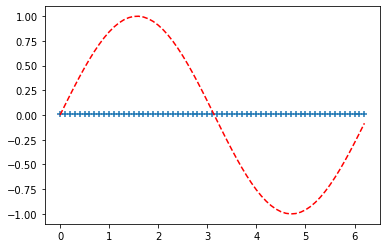

In [5]:
"""Forward Propagation of Output Layer"""
y2 = np.dot(y1, w2) + b2
loss = np.sum((y2-t)**2)

print('y2:', y2[:6,:], '\n...\n')
print('loss:', loss)

plt.plot(x, t, 'r--')
plt.scatter(x, y2.reshape(-1), marker='+')


In [6]:
"""Backpropagation of Output Layer"""
delta2 = y2 - t.reshape(-1,1)
grad_w2 = np.dot(y1.T, delta2)
grad_b2 = np.sum(delta2, axis=0)

print('delta2 =', delta2[:6], '\n...\n')
print('grad_w2 =', grad_w2, '\n')
print('grad_b2 =', grad_b2, '\n')

delta2 = [[ 0.00697967]
 [-0.09284888]
 [-0.19167993]
 [-0.28852593]
 [-0.3824192 ]
 [-0.47242152]] 
...

grad_w2 = [[0.33361869]
 [0.15877213]
 [0.37885642]] 

grad_b2 = [0.45622428] 



In [7]:
"""Backpropagation of Middle Layer"""
grad_y1 = np.dot(delta2, w2.T)
delta1 = grad_y1 * (1-y1) * y1
grad_w1 = np.dot(x.reshape(-1,1).T, delta1)
grad_b1 = np.sum(delta1, axis=0)

print('grad_y1 =', grad_y1[:6,:], '\n...\n')
print('delta1 =', delta1[:6], '\n...\n')
print('grad_w1 =', grad_w1, '\n')
print('grad_b1 =', grad_b1, '\n')

grad_y1 = [[ 9.02262787e-05 -5.03146786e-05  5.71825194e-05]
 [-1.20025938e-03  6.69324568e-04 -7.60685871e-04]
 [-2.47785031e-03  1.38177307e-03 -1.57038199e-03]
 [-3.72978060e-03  2.07991192e-03 -2.36381523e-03]
 [-4.94354077e-03  2.75676519e-03 -3.13305746e-03]
 [-6.10700267e-03  3.40556965e-03 -3.87042228e-03]] 
...

delta1 = [[ 2.25560552e-05 -1.25786560e-05  1.42949267e-05]
 [-3.00058919e-04  1.67331028e-04 -1.90163337e-04]
 [-6.19452102e-04  3.45443139e-04 -3.92581059e-04]
 [-9.32431826e-04  5.19977899e-04 -5.90935341e-04]
 [-1.23587050e-03  6.89191277e-04 -7.83243868e-04]
 [-1.52673584e-03  8.51392412e-04 -9.67584726e-04]] 
...

grad_w1 = [[ 0.20752326 -0.1157325   0.13149656]] 

grad_b1 = [ 0.00146669 -0.00081933  0.00092467] 



In [8]:
"""Update Weights and Biases"""
print('w1 =', w1, '\n')
print('b1 =', b1, '\n')
print('w2 =', w2, '\n')
print('b2 =', b2, '\n')

w1 -= eta * grad_w1
b1 -= eta * grad_b1
w2 -= eta * grad_w2
b2 -= eta * grad_b2

print('------Updated------\n')
print('w1 =', w1, '\n')
print('b1 =', b1, '\n')
print('w2 =', w2, '\n')
print('b2 =', b2, '\n')

w1 = [[ 0.00663911 -0.00433347  0.00948886]] 

b1 = [-0.00955213  0.00208376 -0.0140268 ] 

w2 = [[ 0.01292702]
 [-0.00720875]
 [ 0.00819273]] 

b2 = [8.75203118e-05] 

------Updated------

w1 = [[-0.01411322  0.00723978 -0.0036608 ]] 

b1 = [-0.0096988   0.0021657  -0.01411927] 

w2 = [[-0.02043485]
 [-0.02308597]
 [-0.02969291]] 

b2 = [-0.04553491] 



loss: 2005.7127487965959


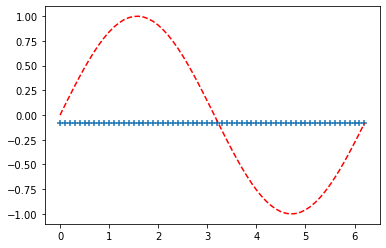

In [9]:
"""Forward Propagation"""
# middle
u1 = np.dot(x.reshape(-1,1), w1) + b1
y1 = 1/(1+np.exp(-u1))
# output
y2 = np.dot(y1, w2) + b2
loss = np.sum((y2-t)**2)

print('loss:', loss)

plt.plot(x, t, 'r--')
plt.scatter(x, y2.reshape(-1), marker='+')

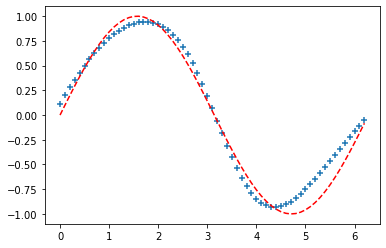

In [10]:
"""Training with single data"""
epoch = 1000
for i in range(epoch):
  for j in range(len(x)):

    # forward propagation
    u1 = np.dot(x[j].reshape(-1,1), w1) + b1
    y1 = 1/(1+np.exp(-u1))
    y2 = np.dot(y1, w2) + b2

    # backward propagation
    delta2 = y2 - t[j].reshape(-1,1)
    grad_w2 = np.dot(y1.T, delta2)
    grad_b2 = np.sum(delta2, axis=0)
    grad_y1 = np.dot(delta2, w2.T)
    delta1 = grad_y1 * (1-y1) * y1
    grad_w1 = np.dot(x[j].reshape(-1,1).T, delta1)
    grad_b1 = np.sum(delta1, axis=0)
    # update
    w1 -= eta * grad_w1
    b1 -= eta * grad_b1
    w2 -= eta * grad_w2
    b2 -= eta * grad_b2

    
# forward propagation
u1 = np.dot(x.reshape(-1,1), w1) + b1
y1 = 1/(1+np.exp(-u1))
y2 = np.dot(y1, w2) + b2

# plot
plt.plot(x, t, 'r--')
plt.scatter(x, y2.reshape(-1), marker='+')